# Hierarchical Clustering utilizando `SciPy`

Este notebook sirve como complemento a la clase 5 (Hierarchical Clustering) y tiene como fin ilustrar cómo se calcula el agrupamiento jerárquico para una matriz de entrada sencilla con 6 muestras y 2 variables. Utilizaremos la librería `SciPy` y las funciones `linkage` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) y `dendrogram` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html). Comenzamos definiendo la matriz y representándola gráficamente.

Input data:


,V1,V2
0,1.0,1.0
1,1.5,1.5
2,5.0,5.0
3,3.0,4.0
4,4.0,4.0
5,3.0,3.5


<AxesSubplot:xlabel='V1', ylabel='V2'>

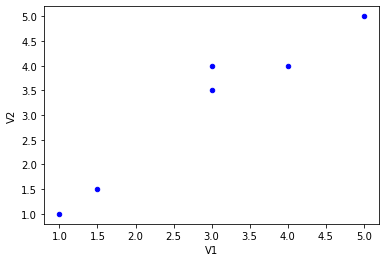

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

sampleLabels = ['A', 'B', 'C', 'D', 'E', 'F']

df = pd.DataFrame({
    'V1': [1, 1.5, 5, 3, 4, 3], 
    'V2': [1, 1.5, 5, 4, 4, 3.5]
})

print("Input data:")

display(df)

df.plot.scatter(x = 'V1', y = 'V2', c = 'blue')

En el ejemplo paso a paso del algoritmo, veíamos que el primer paso era calcular la matriz de distancias entre todos los pares de muestras. En `SciPy` esta matriz se puede obtener con la función `pdist` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html):

In [2]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

print("Euclidean distances matrix:")
distances = pdist(df, metric = 'euclidean')
display(pd.DataFrame(squareform(distances)))

Euclidean distances matrix:


,0,1,2,3,4,5
0,0.000000,0.707107,5.656854,3.605551,4.242641,3.201562
1,0.707107,0.000000,4.949747,2.915476,3.535534,2.500000
2,5.656854,4.949747,0.000000,2.236068,1.414214,2.500000
3,3.605551,2.915476,2.236068,0.000000,1.000000,0.500000
4,4.242641,3.535534,1.414214,1.000000,0.000000,1.118034
5,3.201562,2.500000,2.500000,0.500000,1.118034,0.000000


El agrupamiento se obtiene con la función `linkage` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html), que acepta los parámetros `method` (para el linkage criterion, por defecto es `single`) y `metric` (para indicar la función de distancia, por defecto es `euclidean`):

In [3]:
linked = linkage(df, 'single')

print("Linkage:")

display(linkage)

Linkage:


<function scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)>

La función `dendrogram` (https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) nos permite representar gráficamente el árbol obtenido:

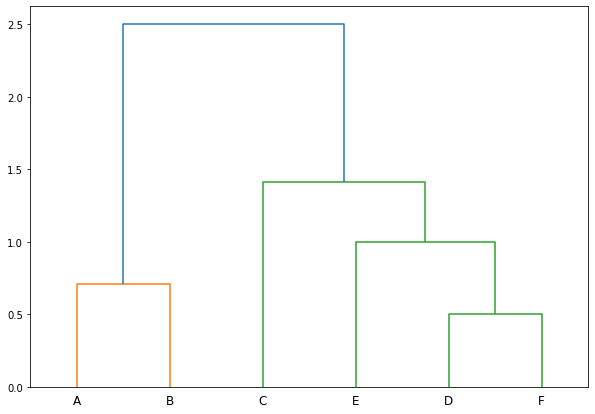

In [4]:
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', labels=sampleLabels, distance_sort='descending', show_leaf_counts=True)
plt.show()

La función `fcluster` (https://docs.scipy.org/doc/scipy-0.13.0/reference/generated/scipy.cluster.hierarchy.fcluster.html) nos permite crear grupos a partir del enlace. En la documentación se pueden ver todos los parámetros, vamos a ver dos maneras de hacerlo. En primer lugar, utilizando `criterion = 'distance'`, la función creará grupos que estén a la distancia máxima especificada. Viendo el dendrograma anterior, si especificamos que la distancia máxima es 1.2, entonces encontraremos tres grupos: (A,B), C, y (E,(D,F)). Lo comprobamos:

In [5]:
from scipy.cluster.hierarchy import fcluster

maximumDistance = 1.2
clusters = fcluster(linked, maximumDistance, criterion = 'distance')

df.labeled = pd.concat([df, pd.DataFrame({'sample' : sampleLabels, 'max_distance=2': clusters})], axis = 1)

print(df.labeled)

    V1   V2 sample  max_distance=2
0  1.0  1.0      A               1
1  1.5  1.5      B               1
2  5.0  5.0      C               3
3  3.0  4.0      D               2
4  4.0  4.0      E               2
5  3.0  3.5      F               2


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


La opción `criterion = 'maxclust'` creará tantos clusters como indiquemos. Si le especificamos `k = 2`, entonces creará dos clusters: (A,B) y (C,(E,(D,F))). Lo comprobamos:

In [6]:
k = 2
clusters = fcluster(linked, k, criterion = 'maxclust')

df.labeled = pd.concat([df.labeled, pd.DataFrame({'maxclust=2': clusters})], axis = 1)

print(df.labeled)

    V1   V2 sample  max_distance=2  maxclust=2
0  1.0  1.0      A               1           1
1  1.5  1.5      B               1           1
2  5.0  5.0      C               3           2
3  3.0  4.0      D               2           2
4  4.0  4.0      E               2           2
5  3.0  3.5      F               2           2


Finalmente, podemos representar gráficamente el dataset en 2D, utilizando las etiquetas del agrupamiento para dar colores a las muestras:

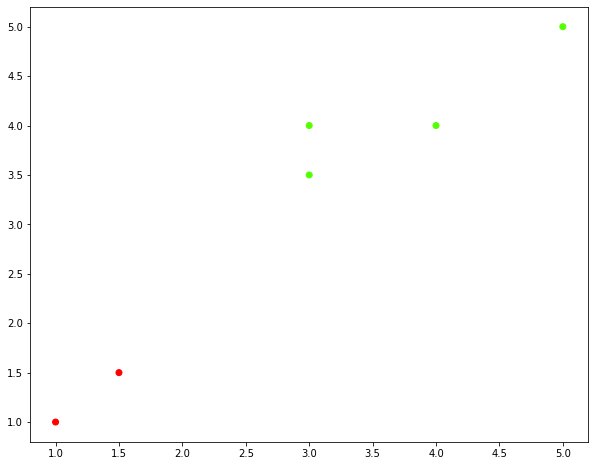

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(df['V1'], df['V2'], c=df.labeled['maxclust=2'], cmap='prism')  # plot points with cluster dependent colors
plt.show()

La librería `sklearn` incluye una función llamada `AgglomerativeClustering` (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html) para realizar el agrupamiento jerárquico. En esta otra página, explican cómo representar gráficamente el dendrograma (https://scikit-learn.org/stable/auto_examples/cluster/plot_agglomerative_dendrogram.html). Para las prácticas utilizaremos `SciPy` puesto que las funciones son más amigables, aunque podéis probar con las funciones de `sklearn` y comparar la utilización de ambas.

## Visualización de heatmaps y dendrogramas utilizando `seaborn`

Los dendrogramas se suelen representar conjuntamente con heatmaps. Para ello, podemos utilizar la función `clustermap`de la librería `seaborn` (https://seaborn.pydata.org/generated/seaborn.clustermap.html).

Entre los muchos parámetros para controlar la visualización, esta función permite especificar el criterio de enlace (`method`, que debe ser uno de los que acepta la función `linkage` que vimos antes) y la métrica de distancia (`metric`).

En el siguiente ejemplo se muestra el agrupamiento de las muestras utilizando el complete-linkage clustering. El parámetro `annot=True` sirve para indicar que se deben mostrar los valores en cada celda y `col_cluster=False` para indicar que no se haga un dendrograma por columnas (algo habitual en ciertos ámbitos y que podéis probar con los datasets de customer segmentation para ver el efecto que se produce).

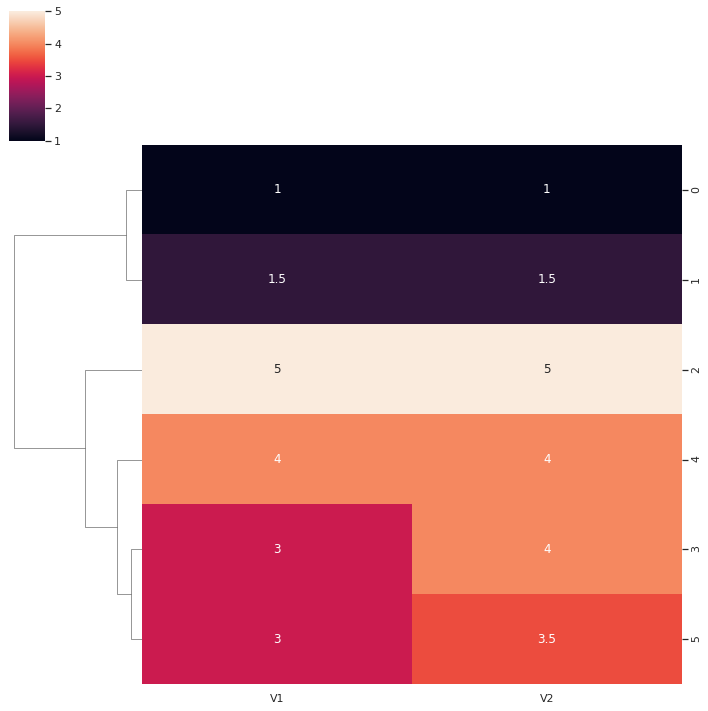

In [8]:
import seaborn as sns; sns.set_theme(color_codes=True)

g = sns.clustermap(df, col_cluster=False, metric = 'euclidean', method = 'complete',  annot=True)